#### 样本特征只有一个，适用简单线性回归

In [4]:
# 线性数学公式: y = ax + b
# 那么如果机器学习了一个公式
# y1 = ax + b, y1 预测值，样本有个真实值 y2
# 如果对a，b进行学习，让他自动学习成最好的值呢？
# 评判预测方程的好坏就是比较，|y2 - y1|的距离，真实值和预测值越小越好，但是为了方便求导，
# 也可以用 -> (y2 - y1) ** 2  来评估
# 所以方程可以推导为: (y2 - y1) ** 2 -> (y2 - ax - b) ** 2, 目标对每一个样本这个值越小越好 
# 推导为 寻找 sum_every_样本((y2 - ax - b) ** 2) 是最小的, a,b的值

In [5]:
# 机器学习算法的基本思路
# 找到 一个函数 是它尽可能的小 -> "损失函数(loss function) / 效用函数(utility function)"
# 通过最优化损失函数，获得机器学习的模型

In [59]:
# 其实也是典型的最小二乘法问题： 最小化误差的平方
# 最小二乘法（又称最小平方法）是一种数学优化技术。它通过最小化误差的平方和寻找数据的最佳函数匹配。

<img src="img/xianxing1.png" width=300 />

<img src="img/xianxing2.png" width=300 />

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

[0, 6, 0, 6]

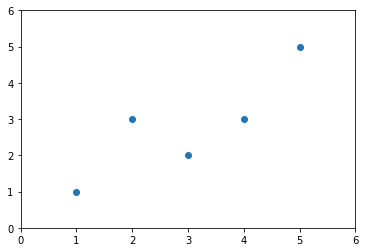

In [34]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])

In [35]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [36]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
a = num / d
b = y_mean - a * x_mean

In [37]:
print('a {}, b {}'.format(a, b))

a 0.8, b 0.39999999999999947


In [38]:
y_hat = a * x + b

[0, 6, 0, 6]

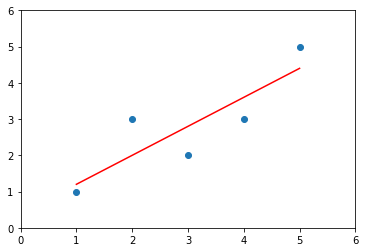

In [42]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])

In [44]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

In [45]:
%run linear/simple_linear_regression.py

In [47]:
# 利用封装好的线性模型生成类来训练模型
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

SimpleLinearRegression1()

In [48]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [49]:
reg1.a_

0.8

In [50]:
reg1.b_

0.39999999999999947

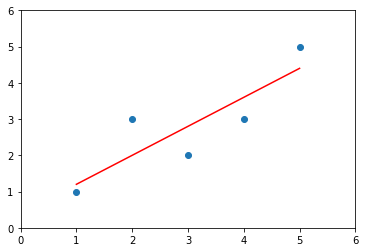

In [58]:
y_hat1 = reg1.predict(x)
plt.axis([0, 6, 0, 6])
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')

In [60]:
# 使用向量化运算 替代 for循环(理解为向量相乘)

In [62]:
%run linear/simple_linear_regression2.py

In [76]:
# for循环 - 向量相乘, 性能比较
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)
reg2 = SimpleLinearRegression2()
%timeit reg2.fit(big_x, big_y)

reg1 = SimpleLinearRegression1()
%timeit reg1.fit(big_x, big_y)

5.69 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.1 s ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
# 线性回归算法的评测
# 1.均方误差(MSE, Mean Squared Error)
# 2.均方根误差(RMSE, Root Mean Squared Error)
# 3.平均绝对误差(MAE, Mean Absolute Error)

<img src="img/linear_1.png" width=400/>